# Ejemplo de clasificación por el método Naïve Bayes

*Ignacio Díaz Blanco, 2018-2023. Universidad de Oviedo*


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
from scipy.stats import multivariate_normal
from sklearn.model_selection import train_test_split

<Figure size 640x480 with 0 Axes>

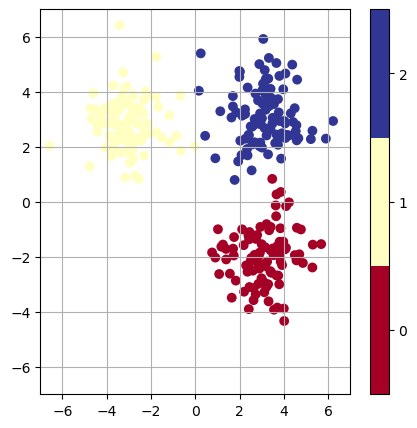

In [2]:
N0 = 100;
N1 = 100;
N2 = 100;

# Definimos dos nubes de puntos en R2
X = np.vstack((
        np.random.randn(N0,2) + np.array([3,-2])[np.newaxis,:],
        np.random.randn(N1,2) + np.array([-3,3])[np.newaxis,:],
        np.random.randn(N2,2) + np.array([3,3])[np.newaxis,:]
         ))

# Definimos sus clases (targets)
y = np.hstack((0*np.ones(N0),1*np.ones(N1),2*np.ones(N1)))

# Utilizamos una escala de color perceptualmente uniforme (tipo color Brewer)
plt.set_cmap(cm.RdYlBu)

# Dibujamos las tres clases
plt.figure(figsize=(5,5))
plt.scatter(X[:,0],X[:,1], s=50, c=y, linewidths=0)
plt.axis([-7,7,-7,7])
plt.colorbar(values=[0,1,2],boundaries=[-0.5,0.5,1.5,2.5],ticks=[0,1,2])
plt.grid(True)

In [3]:
Xtrn,Xtst,ytrn,ytst = train_test_split(X,y,train_size=0.9)

# calculamos las medias (muestrales) de cada clase
m0 = np.mean(Xtrn[np.where(ytrn==0)[0],:],axis=0)
m1 = np.mean(Xtrn[np.where(ytrn==1)[0],:],axis=0)
m2 = np.mean(Xtrn[np.where(ytrn==2)[0],:],axis=0)

# calculamos las matrices de covarianza (muestrales) de cada clase
C0 = np.cov (Xtrn[np.where(ytrn==0)[0],:].T)
C1 = np.cov (Xtrn[np.where(ytrn==1)[0],:].T)
C2 = np.cov (Xtrn[np.where(ytrn==2)[0],:].T)

# calculamos las "priors"
pc0 = N0/(N0+N1+N2)
pc1 = N1/(N0+N1+N2)
pc2 = N2/(N0+N1+N2)


In [4]:
# definimos los puntos de test (retícula ordenada, para visualización de fronteras)
t = np.linspace(-7,7,100)
[xi,yi] = np.meshgrid(t,t)
X = np.vstack((xi.ravel(),yi.ravel())).T

# probabilidades condicionadas a cada clase p(x|C_i)
pxc0 = multivariate_normal.pdf(X,m0,C0)
pxc1 = multivariate_normal.pdf(X,m1,C1)
pxc2 = multivariate_normal.pdf(X,m2,C2)

# probabilidad total p(x)
px = pc0*pxc0 + pc1*pxc1 + pc2*pxc2;

clase_pred = {}
# finalmente, aplicamos Bayes p(C_i) = p(x|C_i)*p(C_i)/p(x)
clase_pred[0] = pc0*pxc0/px
clase_pred[1] = pc1*pxc1/px
clase_pred[2] = pc2*pxc2/px


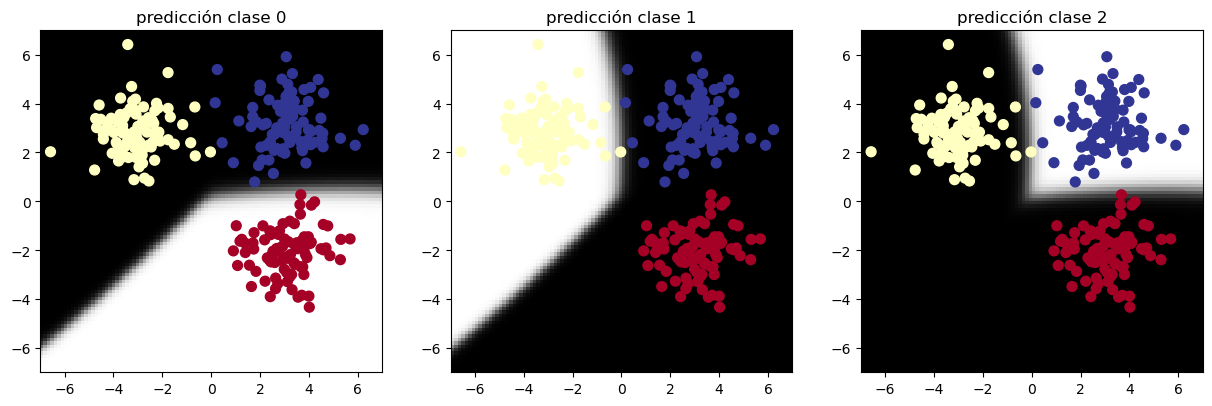

In [5]:
plt.figure(figsize=(15,15))
# Utilizamos una escala de color perceptualmente uniforme (tipo color Brewer)
# plt.set_cmap(cm.gray)

for i in range(3):
    plt.subplot(1,3,i+1)
    plt.imshow(clase_pred[i].reshape(100,100),extent=[-7,7,-7,7],origin='lower',cmap=cm.gray)
    plt.scatter(Xtrn[:,0],Xtrn[:,1],c=ytrn,s=50,cmap=cm.RdYlBu)
    plt.title(u'predicción clase %d'%i)

<a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/"><img alt="Licencia de Creative Commons" style="border-width:0" src="https://i.creativecommons.org/l/by-sa/4.0/88x31.png" /></a><br /><span xmlns:dct="http://purl.org/dc/terms/" property="dct:title">Ejemplo - clasificación método Naive Bayes</span> by <a xmlns:cc="http://creativecommons.org/ns#" href="http://isa.uniovi.es/~idiaz" property="cc:attributionName" rel="cc:attributionURL">Ignacio Díaz Blanco</a> is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/">Creative Commons Reconocimiento-CompartirIgual 4.0 Internacional License</a>.